![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 001 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.001 | 06/04/2023 | Royi Avital | Make it clear that $ H $ may assumed to be invertible at `4.1.`    |
| 0.1.000 | 12/03/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0001Part002.ipynb)

In [3]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp

# Machine Learning

# Miscellaneous
import os
import math
from platform import python_version
import random
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [4]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [5]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=1ZmoK4qFlXs142kLBJeHSKig7DOKEnLIX'
DATA_FILE_NAME  = r'ImgData.mat'


## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

## Team Members

 - `Nadav_Talmon_203663950`.
 - `Nadav_Shaked_312494925`.
 - `Adi_Rosenthal_316550797`.

## 4. Descent Methods

### Gradient Descent

Let $\boldsymbol{Y} \in \mathbb{R}^{d \times d}$ be a blurred version of the image $\boldsymbol{X} \in \mathbb{R}^{d \times d}$:

$$ \boldsymbol{Y} = \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} $$

Where $\boldsymbol{H} \in\mathbb{R}^{d \times d}$ is a known separable blurring matrix.

The goal is to find $\boldsymbol{X}$ that minimizes:

$$\boldsymbol{X}^{\star} = \arg \min_{\boldsymbol{X}} f \left( \boldsymbol{X} \right) = \arg \min_{\boldsymbol{X}} {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2}$$

## Generate / Load Data

Load the data: $\boldsymbol{Y}$ and $\boldsymbol{H}$.

In [6]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [7]:
dData = sp.io.loadmat(DATA_FILE_NAME)
mY    = dData['Y']
mH    = dData['H']

print(f'The image dimensions are: {mY.shape}')
print(f'The filter matrix dimensions are: {mH.shape}')

The image dimensions are: (256, 256)
The filter matrix dimensions are: (256, 256)


### Plot the Data

This sections illustrates the data.

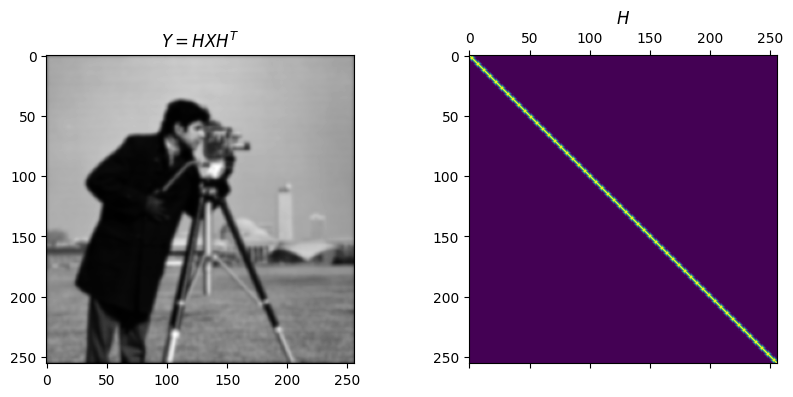

In [8]:
hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat

hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].matshow(mH)
hAs[1].set_title('$H$')

plt.show()

Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.  
You may assume $ H $ is invertible.

* <font color='brown'>(**#**)</font> A solution, numerically, can be found even for the cases $ H $ is not invertible.

### 4.1. Solution

$$\nabla ({\left\|H X H^T - Y \right\|}_{F}^{2}) = \nabla <HX H^{T} - Y, HX H^{T} - Y> = 2 \cdot <\nabla(HX H^T - Y), HX H^T - Y> = 2 \cdot <HH^T, HX H^{T} - Y> = 2 \cdot <I, H^T(HX H^T - Y)H>$$

$$f'(X) = 2 H^T (H X H^T - Y) H$$
$$f'(X) = 2 (H^T H X H^T H - H^T Y H)$$
$$f'(X) = 0$$
$$H^T H X H^T H - H^T Y H = 0$$
$$H^T H X H^T H = H^T Y H$$
$$X = (H^T H)^{-1} H^T Y H (H^T H)^{-1}$$
$$X = (H)^{-1} Y (H^T)^{-1}$$

---

### 4.2. Task

Compute $\boldsymbol{X}^{\star}$ and plot it.

**Tip**: Avoid inverting the same matrix twice!

In [9]:
#===========================Fill This===========================#
# 1. Compute the optimal `mX` using the derivation.
# !! You may use `np.linalg.inv()` or better `np.linalg.solve()` or np.linalg.lstsq().

mH_inv = np.linalg.inv(mH)
mX = mH_inv @ mY @ mH_inv.T

#===============================================================#

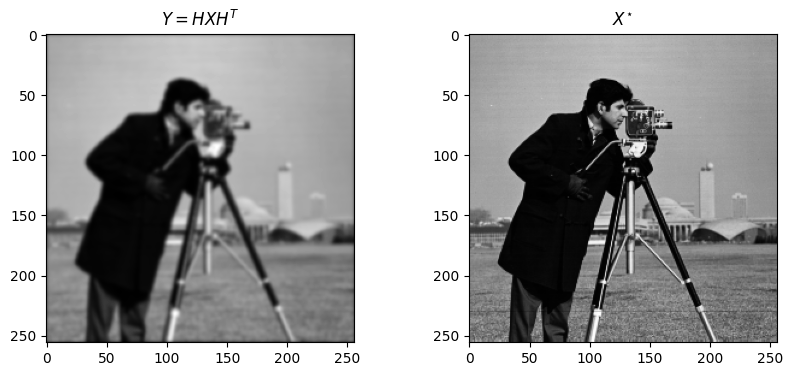

In [10]:
# Plot the Estimated Image

hF, hAs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
hAs = hAs.flat
hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('$Y = H X H^T$')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('$X^{\star}$')

plt.show()

## Iterative Solution

In practice, for many real world problems, the direct solution can not be computed due to the inversion of a matrix.  
In such cases, the model is given by a sparse matrix and the solution is calculated by using only _matrix vector operations_ (Also called _MatVec_, namely matrix vector multiplication).  

In this section we'll implement such method based on the Gradient Descent.

Given the function:

$$ f \left( \boldsymbol{X} \right) = {\left\| \boldsymbol{H} \boldsymbol{X} \boldsymbol{H}^{T} - \boldsymbol{Y} \right\|}_{F}^{2} $$

### 4.3. Task

Implement the following functions:

```python
#==================================================#
def ObjF(mX):
#==================================================#
def GradF(mX):
#==================================================#
def ApplyGradientDescent(objF, gradF, mX0, μ, numIter, ε):
#==================================================#
```



In [11]:
#===========================Fill This===========================#
# 1. Implement the objective function.
# !! You may use `np.linalg.norm()` or the element wise definition of the Frobenius norm (See `np.linalg.inner()`).

def ObjF(mX: np.ndarray) -> float:
    '''
    f(X) = ||HXH^T - Y||_F^2 is the objective function
    '''

    f_X = np.linalg.norm(mH @ mX @ mH.T - mY, 'fro') ** 2
    return f_X

#===============================================================#

In [12]:
#===========================Fill This===========================#
# 1. Implement the gradient of the objective function.

def GradF(mX: np.ndarray) -> np.ndarray:
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''

    D_f_X = 2 * mH.T @ (mH @ mX @ mH.T - mY) @ mH
    return D_f_X

#===============================================================#

In [13]:
#===========================Fill This===========================#
# 1. Implement the gradient descent optimizer function.

def ApplyGradientDescent(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable).
        gradF   - Objective gradient function (Callable).
        mX0     - Initial point (Array).
        μ       - Step size / Learning rate (Float).
        numIter - Maximum number of iterations (Integer).
        ε       - Stopping criterion value (Float).
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List).
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''

    lF = []
    mX = mX0

    numOfPixels = mX.shape[0] * mX.shape[1]
    iter = 0
    while(iter < numIter and objF(gradF(mX)) >= numOfPixels * ε):
      mX -= μ * gradF(mX)
      lF.append(objF(mX))
      iter += 1
    return (mX, lF)

#===============================================================#

### 4.3. Task

 - Set a reasonable initial point for `mX0`.
 - Set the parameter `μ`.
 - Set the parameter `numIter`.
 - Set the parameter `ε`.

In [14]:
#===========================Fill This===========================#

mX0 = np.random.rand(256, 256)
μ       = 0.5
numIter = 1000
ε       = 0.1

#===============================================================#

### 4.4. Task

In the following section we'll use the function `ApplyGradientDescent()` to estimate the image `mX`.  

 - Optimize the parameters above to get a comparable result as fast as you can.
 - Time the run time of the function and the number of iterations required.

In [15]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescent()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

import time

start_time = time.time()
mXIter = ApplyGradientDescent(ObjF, GradF, mX0, μ, numIter, ε)
end_time = time.time()
total_time = end_time - start_time

print("Execution time:", total_time, "seconds")

#===============================================================#

Execution time: 20.11225700378418 seconds


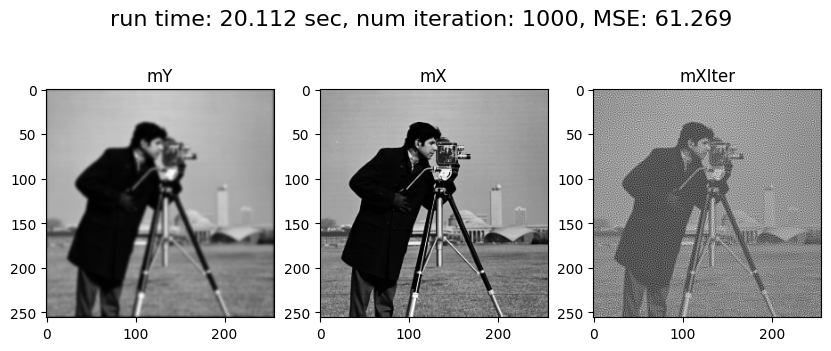

In [16]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX` and `mXIter`.
# 2. Calculate the MSE between `mX` and `mXIter`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE.

hF, hAs = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 4))
hAs = hAs.flat
hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('mY')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('mX')
hAs[2].imshow(mXIter[0], cmap = 'gray')
hAs[2].set_title('mXIter')

mse = np.round(np.linalg.norm(mXIter[0] - mX), 3)
hF.suptitle('run time: {} sec, num iteration: {}, MSE: {}'.format(np.round(total_time, 3), len(mXIter[1]), mse), fontsize=16)

plt.show()

#===============================================================#

## Acceleration Methods  

The convergence speed of the 1st derivative method is sometimes very slow (Depends on the condition number of the model).  
For small problems one might use a 2nd order methods, yet those are more sensitive and require more calculations per iteration.

[Yurii Nesterov](https://en.wikipedia.org/wiki/Yurii_Nesterov), a Russian mathematician, an internationally recognized expert in convex optimization, was a pioneer in developing some approaches to [acceleration of 1st order methods](https://en.wikipedia.org/wiki/Gradient_descent#Fast_gradient_methods).  

In this section we'll implement such method, yet based on the [_momentum_ approach](https://en.wikipedia.org/wiki/Gradient_descent#Momentum_or_heavy_ball_method).

![](https://i.imgur.com/hFQv6Sa.png)

Let's compare the update rule of both methods:

 - Vanilla Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right)$.
 - Momentum Accelerated Gradient Descent: $\boldsymbol{x}^{\left( k \right)} = \boldsymbol{x}^{\left( k - 1 \right)} - \mu \nabla f \left( \boldsymbol{x}^{\left( k - 1 \right)} \right) + \beta \left( \boldsymbol{x}^{\left( k - 1 \right)} - \boldsymbol{x}^{\left( k - 2 \right)} \right) $.  
   Where $\beta \in \left[ 0, 1 \right)$ (Typically $\beta \in \left[ 0.9, 0.99 \right]$).

The momentum method basically incorporate more data in order to optimize the direction of descent.

### 4.5. Question

Show that $\boldsymbol{x}^{\left( k \right)}$ can be expressed by:

$$\boldsymbol{x}^{\left( k + 1 \right)} = \boldsymbol{x}^{\left( k \right)} - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f \left( \boldsymbol{x}^{\left( l \right)} \right)$$

* <font color='brown'>(**#**)</font> Basically, the update step is a combination of all (Weighted) previous steps.

### 4.5. Solution
Starting with the base case of $k=1$:
$x^{(1)} = x^{(0)} - \mu \nabla f (x^{(0)} ) $

Assuming the update rule holds for $k$, we can express the update rule for $k+1$ as follows:

$x^{(k+1)} = x^{(k)} - \mu \nabla f (x^{(k)} ) + \beta( x^{( k)} - x^{( k - 1 )} ) = x^{(k)} - \mu \nabla f (x^{( k )} ) + \beta \cdot( x^{(k - 1)} - \mu \nabla f \left(x^{( k - 1 )} \right) + \beta( x^{( k - 1 )} - x^{( k - 2 )}) - x^{( k - 1 )}) = x^{(k)} - \mu \nabla f (x^{( k )} ) + \beta \cdot( - \mu \nabla f \left(x^{( k - 1 )} \right) + \beta( x^{( k - 1 )} - x^{( k - 2 )}))=x^{(k)} - \mu \nabla f (x^{( k )} ) + \beta \cdot( - \mu \nabla f \left(x^{( k - 1 )} \right) + \beta( - \mu \nabla f (x^{(k-2)} ) + \beta( x^{( k-2)} - x^{( k - 3 )} )))$

We can continue this recursive process until we reach the term $\beta(x^{(1)} - x^{(0)})$, which can be expressed as $-\beta\mu\nabla f(x^{(0)})$. Therefore, we have:

$${x}^{(k + 1)} = x^{(k)} - \mu \nabla f (x^{( k )} ) + \beta \cdot( - \mu \nabla f (x^{( k - 1 )} ) + \beta\cdot( - \mu \nabla f (x^{(k-2)} ) + \beta\cdot( ... -\beta\mu\nabla f(x^{(0)})) = x^{(k)} - \mu \sum_{l = 0}^{k} \beta^{k - l} \nabla f ({x}^{( l )} )$$

This shows that the update step for momentum accelerated gradient descent is a combination of all weighted previous steps.


---

### 4.6. Task

Implement the following function:

```python
#====================================================#
def ApplyGradientDescentMomentum(objF, gradF, mX0, μ, β, numIter, ε):
#====================================================#
```

In [17]:
#===========================Fill This===========================#
# 1. Implement the momentum accelerated gradient descent optimizer function.

def ApplyGradientDescentMomentum(objF: Callable, gradF: Callable, mX0: np.ndarray, μ: float, β: float, numIter: int, ε: float) -> Tuple[np.ndarray, List]:
    '''
    Apply gradient descent.
    Args:
        objF    - Objective function (Callable)
        gradF   - Objective gradient function (Callable)
        mX0     - Initial point (Array)
        μ       - Step size / Learning rate (Float)
        numIter - Maximum number of iterations (Integer)
        β       - Momentum decaying factor (Float)
        ε       - Stopping criterion value (Float)
    Output:
        mX      - The converged mX (Array).
        lF      - The value objective for each iteration (List)
    Stopping criterion:
        - Stop iterate when ||∇f(X)||_F < (numPixels * ε).
        - Stop iterate after `numIter` iterations.
    '''

    lF = []
    mX = mX0

    numOfPixels = mX.shape[0] * mX.shape[1]
    prevX = 0
    iter = 0
    while(iter < numIter and objF(gradF(mX)) >= numOfPixels * ε):
      s = mX
      mX -= μ * gradF(mX) + β * (mX - prevX)
      lF.append(objF(mX))
      prevX = s
      iter += 1
    return (mX, lF)

#===============================================================#

### 4.7. Task

Repeat the above for the accelerated method:

 - Set the the same initial `mX0` as above.
 - Set the parameters for the `ApplyGradientDescentMomentum()` function.
 - Run the function, optimize parameters to converge as fast as you can while achieving similar result to `mX`.
 - Plot `mY`, `mX`, `mXIter`, `mXMomentum`. Write the MSE between `mXIter` and `mXMomentum` to `mX`, Write the number of iterations for each and the run time.

In [18]:
#===========================Fill This===========================#
# 1. Estimate `mXIter` using `ApplyGradientDescentMomentum()`.
# 2. Time the run time and measure the number of iterations to converge.
# 3. Optimize the parameters to get a comparable result to `mX` from above.

mMomentum = 0.99
mX0 = np.random.rand(256, 256)
μ = 0.6
numIter = 1000
ε = 0.1

start_time = time.time()
mXMomentum = ApplyGradientDescentMomentum(ObjF, GradF, mX0, μ, mMomentum, numIter, ε)
end_time = time.time()
total_time_momentum = end_time - start_time

print("Execution time:", total_time, "seconds")

#===============================================================#

Execution time: 20.11225700378418 seconds


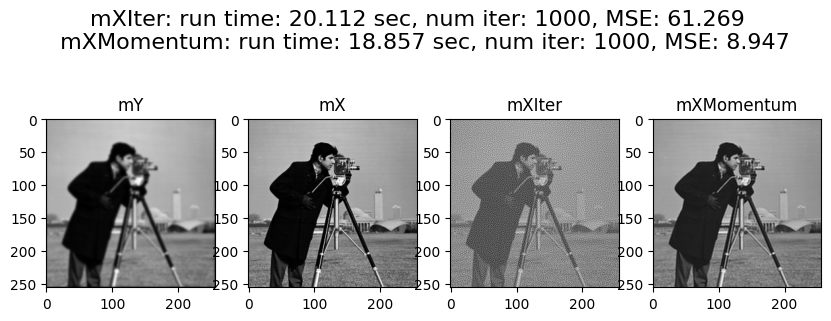

In [19]:
#===========================Fill This===========================#
# 1. Plot `mY`, `mX`, `mXIter` and `mXMomentum`.
# 2. Calculate the MSE between `mX` <-> `mXIter`, `mX` <-> `mXMomentum`.
# 3. In the title of the plots show: The run time, the number of iterations and the MSE (For `mXIter` and `mXMomentum`).

hF, hAs = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 4))
hAs = hAs.flat
hAs[0].imshow(mY, cmap = 'gray')
hAs[0].set_title('mY')
hAs[1].imshow(mX, cmap = 'gray')
hAs[1].set_title('mX')
hAs[2].imshow(mXIter[0], cmap = 'gray')
hAs[2].set_title('mXIter')
hAs[3].imshow(mXMomentum[0], cmap = 'gray')
hAs[3].set_title('mXMomentum')

mse_momentum = np.round(np.linalg.norm(mXMomentum[0] - mX), 3)
hF.suptitle('mXIter: run time: {} sec, num iter: {}, MSE: {} \n mXMomentum: run '\
'time: {} sec, num iter: {}, MSE: {}'.format(np.round(total_time, 3), len(mXIter[1]), mse, np.round(total_time_momentum, 3), len(mXMomentum[1]), mse_momentum), fontsize=16)

plt.show()

#===============================================================#

### 4.8. Task (Bonus 3%)

Plot the objective value function as a function of the iteration for both iterative methods.  

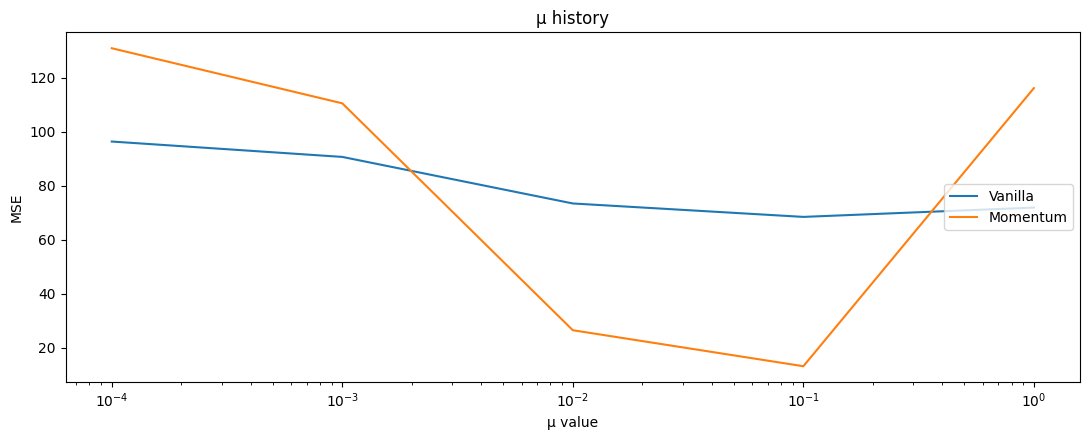

In [20]:
#===========================Fill This===========================#
# 1. Plot the objective value function as a function of the iteration index for both iterative methods.

fig, (ax1)= plt.subplots(1, 1, figsize=(11, 4.5), tight_layout=True)

history_vanilla = []
history_momentum = []
μ_values = [0.0001, 0.001, 0.01, 0.1, 1]
numIter = 100
for μ in μ_values:
  mX0 = np.random.rand(256, 256)
  mXIter = ApplyGradientDescent(ObjF, GradF, mX0, μ, numIter, ε)
  mse_vanilla = np.round(np.linalg.norm(mXIter[0] - mX), 3)
  history_vanilla.append(mse_vanilla)
  mX0 = np.random.rand(256, 256)
  mXMomentum = ApplyGradientDescentMomentum(ObjF, GradF, mX0, μ, mMomentum, numIter, ε)
  mse_momentum = np.round(np.linalg.norm(mXMomentum[0] - mX), 3)
  history_momentum.append(mse_momentum)
ax1.semilogx(μ_values, history_vanilla, label='Vanilla')
ax1.semilogx(μ_values, history_momentum, label='Momentum')
ax1.set_title('μ history')
ax1.set_xlabel('μ value')
ax1.set_ylabel('MSE')
ax1.legend(loc='right')

plt.show()

#===============================================================#